<a href="https://colab.research.google.com/github/ARONNU/MarkovSimple/blob/main/Markov_Chaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Markov Chain Model**


---


### Submitted by: Aus & Duran

*Scenario:*

Joven's Mother usually cooks one of his favorite dishes every time he is feeling down. She either goes for a Mechado, Adobo or Lumpiang Shanghai.

From his memory, if she cooks Adobo for that day. The next day it is 60% likely she will go for a Lumpiang Shanghai, 20% she will cook Mechado the next day and 20% chance she will recook Adobo.

When she cooks Lumpiang Shanghai for that day, there is a 60% chances she'll go for a Lumpiang Shanghai again the next day, 30% chance for adobo and only 10% chances she'll Mechado the next day.

Finally, when she cooks a Mechado on that day, there is a mere 10% chance she continues to have Mechado the next day as well, 70% she is likely to go for a Lumpiang Shanghai and 20% chance that she goes for an Adobo the next day.


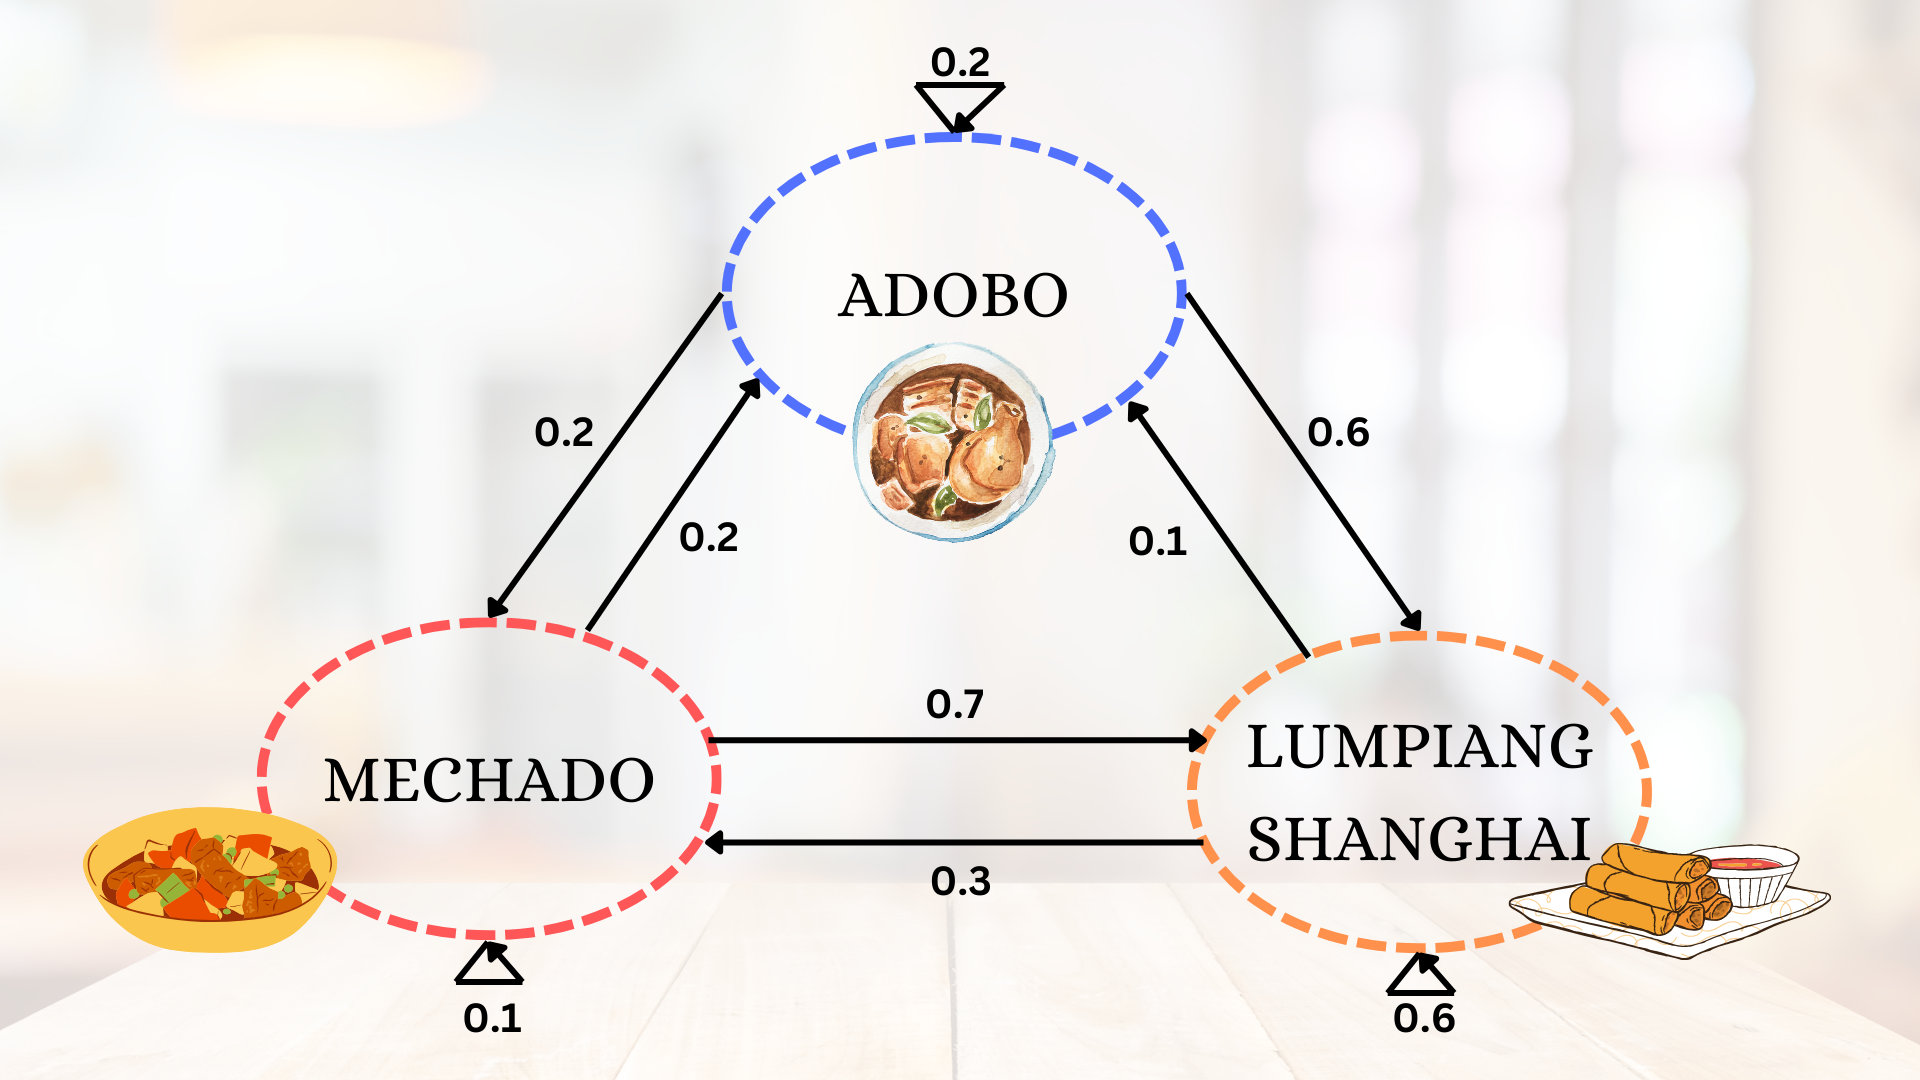

In [ ]:
import numpy as np
import random

def activity_forecast(starting_state, ending_state, days):
    # Define the possible states
    states = ["Adobo", "Shanghai", "Mechado"]

    # Choose the starting state based on user input
    activityToday = starting_state

    # Initialize the list of activities
    activityList = [activityToday]

    # Initialize the probability
    prob = 1

    # Define the transition matrix
    transitionMatrix = np.array([
        [0.2, 0.6, 0.2],
        [0.1, 0.6, 0.3],
        [0.2, 0.7, 0.1]
    ])

    # Define the transition names for each state
    transitionName = [
        ["AA", "AS", "AM"],
        ["SA", "SS", "SM"],
        ["MA", "MS", "MM"]
    ]

    i = 0
    while i != days:
        if activityToday == states[0]:
            # Get the index of the starting state
            index = states.index(activityToday)

            # Randomly choose the next state based on the transition probabilities
            change = np.random.choice(transitionName[index], replace=True, p=transitionMatrix[index])

            # Update the activityToday and activityList variables
            if change == transitionName[index][0]:
                prob = prob * 0.2
                activityList.append(activityToday)
            elif change == transitionName[index][1]:
                prob = prob * 0.6
                activityToday = states[1]
                activityList.append(states[1])
            else:
                prob = prob * 0.2
                activityToday = states[2]
                activityList.append(states[2])

        elif activityToday == states[1]:
            # Get the index of the starting state
            index = states.index(activityToday)

            # Randomly choose the next state based on the transition probabilities
            change = np.random.choice(transitionName[index], replace=True, p=transitionMatrix[index])

            # Update the activityToday and activityList variables
            if change == transitionName[index][1]:
                prob = prob * 0.6
                activityList.append(activityToday)
            elif change == transitionName[index][0]:
                prob = prob * 0.1
                activityToday = states[0]
                activityList.append(states[0])
            else:
                prob = prob * 0.3
                activityToday = states[2]
                activityList.append(states[2])

        else:
            # Get the index of the starting state
            index = states.index(activityToday)

            # Randomly choose the next state based on the transition probabilities
            change = np.random.choice(transitionName[index], replace=True, p=transitionMatrix[index])

            # Update the activityToday and activityList variables
            if change == transitionName[index][2]:
                prob = prob * 0.1
                activityList.append(activityToday)
            elif change == transitionName[index][0]:
                prob = prob * 0.2
                activityToday = states[0]
                activityList.append(states[0])
            else:
                prob = prob * 0.7
                activityToday = states[1]
                activityList.append(states[1])

        i += 1

    # Check if the final state matches the user-specified ending state
    if activityList[-1] == ending_state:
        return activityList
    else:
        return None

# Get user input for starting and ending states
starting_state = input("Enter the starting state: ")
ending_state = input("Enter the ending state: ")

# Get user input for the number of days
days = int(input("Enter the number of days: "))

# Simulate the activity forecast for multiple iterations
iterations = 10000

# Count the number of simulations that end in the desired state
count = 0

for _ in range(iterations):
    activity_list = activity_forecast(starting_state, ending_state, days)
    if activity_list is not None:
        count += 1

# Calculate the probability
probability = (count / iterations) * 100

print("The probability of starting from state:'{}' and ending at state:'{}' after {} days = {}%".format(starting_state, ending_state, days, probability))



Enter the starting state: Adobo
Enter the ending state: Shanghai
Enter the number of days: 3
The probability of starting from state:'Adobo' and ending at state:'Shanghai' after 3 days = 61.72%
